<a href="https://colab.research.google.com/github/namita0210/music-genre-classification/blob/main/Fashion_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torchvision.models as models

In [3]:
device =('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using {device} device')

Using cpu device


In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:03<00:00, 7599381.26it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135120.11it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2580643.20it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11181914.55it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



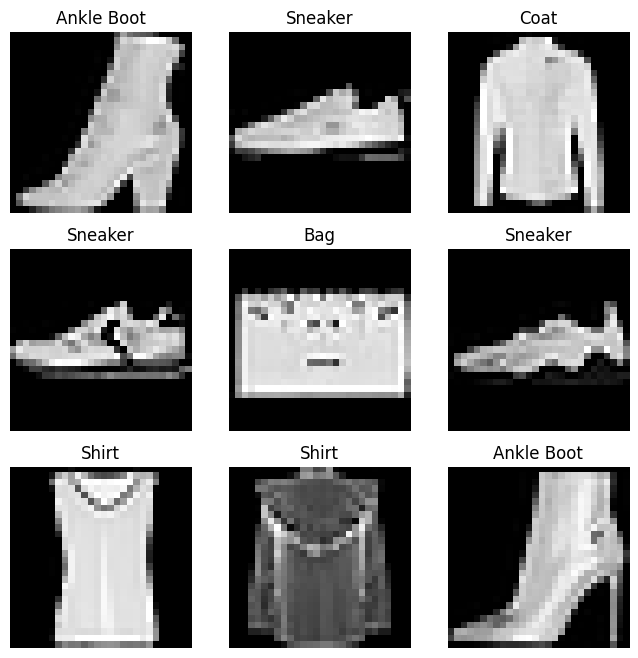

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
#Create an instance of NeuralNetwork and move it to the device and print its structure
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
X=torch.rand(1,28,28,device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

In [10]:
# print(f'''
# X : {X}
# logits : {logits}
# pred_probab : {pred_probab}
# y_pred : {y_pred}
# ''')

In [11]:
print(X.size())

torch.Size([1, 28, 28])


In [12]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [13]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [14]:
print(flat_image)

tensor([[2.4832e-01, 8.0294e-01, 1.9729e-05,  ..., 9.1824e-01, 3.8739e-01,
         2.4166e-01],
        [8.7396e-01, 4.8257e-01, 8.5004e-01,  ..., 8.5146e-01, 9.6685e-01,
         1.7925e-01],
        [2.3690e-01, 4.5527e-01, 5.5330e-01,  ..., 8.5297e-01, 4.1311e-01,
         7.5595e-02]])


In [15]:
layer1 = nn.Linear(in_features = 28*28 , out_features = 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [16]:
print(hidden1) # 3 rows 20 cols from 3 rows 784 columns

tensor([[ 0.1460, -0.0357, -0.3401, -0.5903,  0.4154,  0.4526, -0.3180,  0.3312,
         -0.0130,  0.2243, -0.3189, -0.1657, -0.1944, -0.0973,  0.2512, -0.2494,
         -0.2039, -0.3053, -0.0414, -0.0477],
        [ 0.3091, -0.2768, -0.0572, -0.4346,  0.2986,  0.4301, -0.0713,  0.0084,
         -0.3623,  0.4041, -0.1447, -0.1605, -0.2247,  0.1673,  0.2357,  0.2249,
         -0.3789, -0.4322, -0.3860, -0.0128],
        [ 0.6131, -0.2675, -0.0192, -0.2616,  0.3092,  0.3819, -0.0382,  0.0433,
          0.0322, -0.1994, -0.2835, -0.2387, -0.2059,  0.1935,  0.0830, -0.1201,
         -0.1555, -0.2236, -0.1456,  0.0719]], grad_fn=<AddmmBackward0>)


In [17]:
print(f''' Before ReLU : {hidden1}
      Shape : {hidden1.size()}\n''')

hidden1 = nn.ReLU()(hidden1)

print(f'''After Relu : {hidden1}
      Shape : {hidden1.size()} ''')

 Before ReLU : tensor([[ 0.1460, -0.0357, -0.3401, -0.5903,  0.4154,  0.4526, -0.3180,  0.3312,
         -0.0130,  0.2243, -0.3189, -0.1657, -0.1944, -0.0973,  0.2512, -0.2494,
         -0.2039, -0.3053, -0.0414, -0.0477],
        [ 0.3091, -0.2768, -0.0572, -0.4346,  0.2986,  0.4301, -0.0713,  0.0084,
         -0.3623,  0.4041, -0.1447, -0.1605, -0.2247,  0.1673,  0.2357,  0.2249,
         -0.3789, -0.4322, -0.3860, -0.0128],
        [ 0.6131, -0.2675, -0.0192, -0.2616,  0.3092,  0.3819, -0.0382,  0.0433,
          0.0322, -0.1994, -0.2835, -0.2387, -0.2059,  0.1935,  0.0830, -0.1201,
         -0.1555, -0.2236, -0.1456,  0.0719]], grad_fn=<AddmmBackward0>) 
      Shape : torch.Size([3, 20])

After Relu : tensor([[0.1460, 0.0000, 0.0000, 0.0000, 0.4154, 0.4526, 0.0000, 0.3312, 0.0000,
         0.2243, 0.0000, 0.0000, 0.0000, 0.0000, 0.2512, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.3091, 0.0000, 0.0000, 0.0000, 0.2986, 0.4301, 0.0000, 0.0084, 0.0000,
         0.4041,

In [18]:
seq_modules = nn.Sequential(flatten,
                            layer1,
                            nn.ReLU(),
                            nn.Linear(20,10))
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits)
print(logits.size())

tensor([[ 0.2829,  0.1201,  0.0062,  0.0113,  0.1118,  0.1147,  0.1706,  0.0786,
          0.0852,  0.0914],
        [ 0.3019,  0.1043,  0.0471, -0.0071,  0.1261,  0.1743,  0.1772,  0.0764,
          0.0388, -0.0283],
        [ 0.2745,  0.0643, -0.0529,  0.0335,  0.0895,  0.2109,  0.1421,  0.0600,
         -0.0311,  0.1186]], grad_fn=<AddmmBackward0>)
torch.Size([3, 10])


In [19]:
print(f''' Model Structure : {model} ''')
for name, param in model.named_parameters():
  print(f''' Layer : {name} | Size : {param.size()} | Values : {param[:2]}''')

 Model Structure : NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 
 Layer : linear_relu_stack.0.weight | Size : torch.Size([512, 784]) | Values : tensor([[ 0.0158,  0.0116,  0.0011,  ..., -0.0091,  0.0223,  0.0002],
        [ 0.0246,  0.0308,  0.0300,  ...,  0.0173, -0.0049,  0.0090]],
       grad_fn=<SliceBackward0>)
 Layer : linear_relu_stack.0.bias | Size : torch.Size([512]) | Values : tensor([-0.0331, -0.0092], grad_fn=<SliceBackward0>)
 Layer : linear_relu_stack.2.weight | Size : torch.Size([512, 512]) | Values : tensor([[-0.0294,  0.0349,  0.0299,  ..., -0.0272, -0.0222, -0.0301],
        [ 0.0396, -0.0408, -0.0057,  ...,  0.0139, -0.0373, -0.0350]],
       grad_fn=<SliceBackward0>)
 Layer : linear_relu_stack.2.b

In [20]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [21]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [24]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305792  [   64/60000]
loss: 2.282059  [ 6464/60000]
loss: 2.260672  [12864/60000]
loss: 2.255622  [19264/60000]
loss: 2.237126  [25664/60000]
loss: 2.229538  [32064/60000]
loss: 2.201599  [38464/60000]
loss: 2.194820  [44864/60000]
loss: 2.186604  [51264/60000]
loss: 2.159343  [57664/60000]
Test Error: 
 Accuracy: 37.2%, Avg loss: 2.153483 

Epoch 2
-------------------------------
loss: 2.119642  [   64/60000]
loss: 2.116712  [ 6464/60000]
loss: 2.079606  [12864/60000]
loss: 2.080908  [19264/60000]
loss: 2.048141  [25664/60000]
loss: 2.001791  [32064/60000]
loss: 2.027142  [38464/60000]
loss: 1.888039  [44864/60000]
loss: 1.938890  [51264/60000]
loss: 1.927549  [57664/60000]
Test Error: 
 Accuracy: 55.6%, Avg loss: 1.890372 

Epoch 3
-------------------------------
loss: 1.921500  [   64/60000]
loss: 1.858589  [ 6464/60000]
loss: 1.775288  [12864/60000]
loss: 1.712039  [19264/60000]
loss: 1.813313  [25664/60000]
loss: 1.760504  [32064/600

In [27]:
torch.save(model.state_dict(), 'model_weights.pth')

In [28]:
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
torch.save(model, 'model.pth')

In [30]:
model = torch.load('model.pth')